In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
train_df = pd.read_csv("train_full.csv")
val_df = pd.read_csv("val_full.csv")

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, RobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [3]:
train_df

,text_status,text,languages,image_url_status,image_url,video_thumbnail_status,video_thumbnail_url,video_url_status,video_url,video_bitrate,...,gif_url,gif_bitrate,year,month,day_of_year,day_of_week,date,username,inferred company,likes
0,Has text,"Spend your weekend morning with a Ham, Egg, an...",['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2020.0,December,347.0,Saturday,2020-12-12 00:47:00,TimHortonsPH,tim hortons,1
1,Has text,Watch rapper <mention> freestyle for over an H...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2018.0,June,181.0,Saturday,2018-06-30 10:04:20,IndyMusic,independent,2750
2,Has text,Canadian Armenian community demands ban on mil...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2020.0,September,273.0,Tuesday,2020-09-29 19:47:28,CBCCanada,cbc,57
3,Has text,"1st in Europe to be devastated by COVID-19, It...",['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2020.0,October,275.0,Thursday,2020-10-01 11:40:09,MKWilliamsRome,williams,152
4,Has text,An 85-year-old primary school in Shanghai has ...,['ENGLISH'],Link does not exist,Image does not exist,Link exists and is accessible,https://pbs.twimg.com/amplify_video_thumb/1322...,Link exists and is accessible,https://video.twimg.com/amplify_video/13223822...,288000,...,GIF does not exist,Does not exist,2020.0,November,320.0,Sunday,2020-11-15 16:01:08,cnni,cnn,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208796,Has text,<mention> Back To The Future\nKeep Tom Wilson ...,['ENGLISH'],Link does not exist,Image does not exist,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,https://video.twimg.com/tweet_video/Eqh5sr0XEA...,0,2020.0,December,366.0,Thursday,2020-12-31 01:40:12,MattWi77iams,williams,236
208797,Has text,#CasterSemenya has won a gold medal in the 150...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Daa-wUuXUAA9Hyn?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2018.0,April,100.0,Tuesday,2018-04-10 12:29:11,SABCNews,sabc,591
208798,Has text,Barcelona Star Expected To Return Against Vale...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/ED397wUUYAEOV4K?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2019.0,September,250.0,Saturday,2019-09-07 16:18:10,IndependentNGR,independent,0
208799,Has text,Grateful 🙌🏾 to have <mention> officially join ...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EmkaGpzXIAEyHg8?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2020.0,November,316.0,Wednesday,2020-11-11 20:18:15,TeamCoachBuzz,williams,261


In [4]:
val_df.head()

,text_status,text,languages,image_url_status,image_url,video_thumbnail_status,video_thumbnail_url,video_url_status,video_url,video_bitrate,...,gif_url,gif_bitrate,year,month,day_of_year,day_of_week,date,username,inferred company,likes
0,Has text,LASU Celebrates New Dawn Of Unbroken Peace As ...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EHo1yZyU0AIBW8N?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2019,October,297,Thursday,2019-10-24 10:51:03,IndependentNGR,independent,0
1,Has text,"The US-Taliban agreement, which sets into moti...",['ENGLISH'],Link does not exist,Image does not exist,Link exists and is accessible,https://pbs.twimg.com/media/ESCO6b9WkAUBI1o.jpg,Link exists and is accessible,https://video.twimg.com/amplify_video/12341434...,288000,...,GIF does not exist,Does not exist,2020,March,61,Sunday,2020-03-01 15:48:46,CNN,cnn,672
2,Has text,Many people are understandably anxious to get ...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EdP2C8RXYAAEkdX?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2020,July,201,Sunday,2020-07-19 00:07:00,MayoClinic,mayo clinic,78
3,Has text,ALSO NOW (yes it's wild here today): Sen Merkl...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/DoCNXLsV4AAM2Aw?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2018,September,269,Wednesday,2018-09-26 16:42:17,LisaDNews,desjardins,961
4,Has text,Toyota Motor North America Chief Diversity Off...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/ES2r4X5WkAA8UuA?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,Does not exist,...,GIF does not exist,Does not exist,2020,March,71,Wednesday,2020-03-11 20:15:08,ToyotaSD,toyota,4


In [5]:
train_new = train_df[train_df['video_views']!='Does not exist']

In [6]:
val_new = val_df[val_df['video_views']!='Does not exist']

In [7]:
train_new['video_views'] = train_new['video_views'].astype(int)
val_new['video_views'] = val_new['video_views'].astype(int)

/tmp/ipykernel_160/2189607302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['video_views'] = train_new['video_views'].astype(int)
/tmp/ipykernel_160/2189607302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_new['video_views'] = val_new['video_views'].astype(int)


In [8]:
train_new = train_new.sort_values(by='video_views')
train_new = train_new.reset_index(drop=True)

val_new = val_new.sort_values(by='video_views')
val_new = val_new.reset_index(drop=True)

In [9]:
train_content = train_new["text"].values
val_content = val_new["text"].values

train_views = train_new["video_views"].values
val_views = val_new["video_views"].values

train_labels = train_new["likes"].values
val_labels = val_new["likes"].values

# Model Training

In [12]:
train_log_labels = []
for i in range(len(train_labels)):
  train_log_labels.append(np.log(1+train_labels[i]))

In [13]:
val_log_labels = []
for i in range(len(val_labels)):
  val_log_labels.append(np.log(1+val_labels[i]))

In [14]:
train_content_set_1 = []
train_labels_set_1 = []
train_views_set_1 = []
train_content_set_2 = []
train_labels_set_2 = []
train_views_set_2 = []
train_content_set_3 = []
train_labels_set_3 = []
train_content_set_4 = []
train_labels_set_4 = []
train_content_set_5 = []
train_labels_set_5 = []
train_views_set_5 = []

val_content_set_1 = []
val_labels_set_1 = []
val_views_set_1 = []
val_content_set_2 = []
val_labels_set_2 = []
val_views_set_2 = []
val_content_set_3 = []
val_labels_set_3 = []
val_content_set_4 = []
val_labels_set_4 = []
val_content_set_5 = []
val_labels_set_5 = []
val_views_set_5 = []

train_classes = []
val_classes = []

for i in range(len(train_log_labels)):
  if train_log_labels[i] <= 4.6:
    train_classes.append(0)
    train_content_set_1.append(train_content[i])
    train_views_set_1.append(train_views[i])
    train_labels_set_1.append(train_log_labels[i])
  elif train_log_labels[i] > 4.6 and train_log_labels[i] <= 9.2:
    train_classes.append(1)
    train_content_set_2.append(train_content[i])
    train_views_set_2.append(train_views[i])
    train_labels_set_2.append(train_log_labels[i])
  else:
    train_classes.append(4)
    train_content_set_5.append(train_content[i])
    train_views_set_5.append(train_views[i])
    train_labels_set_5.append(train_log_labels[i])

for i in range(len(val_log_labels)):
  if val_log_labels[i] <= 4.6:
    val_classes.append(0)
    val_content_set_1.append(val_content[i])
    val_views_set_1.append(val_views[i])
    val_labels_set_1.append(val_log_labels[i])
  elif val_log_labels[i] > 4.6 and val_log_labels[i] <= 9.2:
    val_classes.append(1)
    val_content_set_2.append(val_content[i])
    val_views_set_2.append(val_views[i])
    val_labels_set_2.append(val_log_labels[i])
  else:
    val_classes.append(4)
    val_content_set_5.append(val_content[i])
    val_views_set_5.append(val_views[i])
    val_labels_set_5.append(val_log_labels[i])

len(train_labels_set_1), len(train_labels_set_2), len(train_labels_set_3), len(train_labels_set_4), len(train_labels_set_5)

(19580, 31671, 0, 0, 1385)

In [15]:
len(val_labels_set_1), len(val_labels_set_2), len(val_labels_set_3), len(val_labels_set_4), len(val_labels_set_5)

(2747, 4501, 0, 0, 164)

In [20]:
class CustomRegressionDataset(Dataset):
    def __init__(self, texts, views, labels, tokenizer, max_length):
        self.texts = texts
        self.views = views
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx]) + str("with view of video being") + str(self.views[idx])
        label = float(self.labels[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float32)
        }

In [23]:
tokenizer = AutoTokenizer.from_pretrained('vinai/bertweet-base')
model = AutoModelForSequenceClassification.from_pretrained('vinai/bertweet-base', num_labels=1)

criterion = nn.MSELoss()

train_texts = train_content_set_2
val_texts = val_content_set_2
train_views = train_views_set_2
val_views = val_views_set_2
train_labels = train_labels_set_2
val_labels = val_labels_set_2

train_dataset = CustomRegressionDataset(train_texts, train_views, train_labels, tokenizer, max_length=128)
val_dataset = CustomRegressionDataset(val_texts, val_views, val_labels, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}", unit='batch') as progress_bar:
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            progress_bar.set_postfix({'loss': running_loss / (progress_bar.n + 1)})
            progress_bar.update(1)

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}] Loss: {epoch_loss}")

model.eval()
val_loss = 0.0
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        val_loss += loss.item()

average_val_loss = val_loss / len(val_loader)
print(f"Validation Loss: {average_val_loss}")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3: 100%|██████████| 990/990 [03:33<00:00,  4.63batch/s, loss=3.07]


Epoch [1/3] Loss: 3.0701189972234495


Epoch 2/3: 100%|██████████| 990/990 [03:32<00:00,  4.66batch/s, loss=0.68] 


Epoch [2/3] Loss: 0.6799331707183761


Epoch 3/3: 100%|██████████| 990/990 [03:32<00:00,  4.66batch/s, loss=0.567]


Epoch [3/3] Loss: 0.567493336414448
Validation Loss: 0.5494069283735667


In [24]:
torch.save(model, 'vinai_model1_log_100-10k.pth')

## Model Testing

In [36]:
tokenizer = AutoTokenizer.from_pretrained('vinai/bertweet-base')

criterion = nn.MSELoss()

train_texts = train_content_set_2
val_texts = val_content_set_2
train_views = train_views_set_2
val_views = val_views_set_2
train_labels = train_labels_set_2
val_labels = val_labels_set_2

train_dataset = CustomRegressionDataset(train_texts, train_views, train_labels, tokenizer, max_length=128)
val_dataset = CustomRegressionDataset(val_texts, val_views, val_labels, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [37]:
model_log = torch.load('vinai_model1_log_100-10k.pth')

In [49]:
model_log.to(device)

cnt = 0
ans = []
labs = []
batch_order=[]

model_log.eval()
val_loss = 0.0
with torch.no_grad():
    for i,batch in enumerate(val_loader):
        cnt += 32
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_log(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        ans.extend(outputs.logits)
        labs.extend(labels)
        loss = outputs.loss
        # print(labels)
        # print(loss.item())
        val_loss += loss.item()
# print(cnt)


average_val_loss = val_loss / len(val_dataset)
print(f"Validation Loss: {average_val_loss}")

Validation Loss: 0.01721092577220016


In [50]:
import math
predicted_arr = []
for i in ans:
  predicted_arr.append(math.exp(i[0]))

In [56]:
fin_labels = np.exp([i.item() for i in labs])
fin_labels

array([ 279.99996183,  394.99995486,  118.00001117, ...,  268.99997959,
        647.00000734, 1215.99995937])

In [58]:
fin_preds=np.array(predicted_arr)
fin_preds

array([ 305.83735938,  204.95278908,  371.19836742, ..., 3134.16916882,
       3122.60528115, 2404.10299168])

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(fin_labels,fin_preds)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  1195.9057276522199


In [64]:
r2 = r2_score(fin_labels,fin_preds)
print("R2: ",r2)

R2:  0.41600950823682226


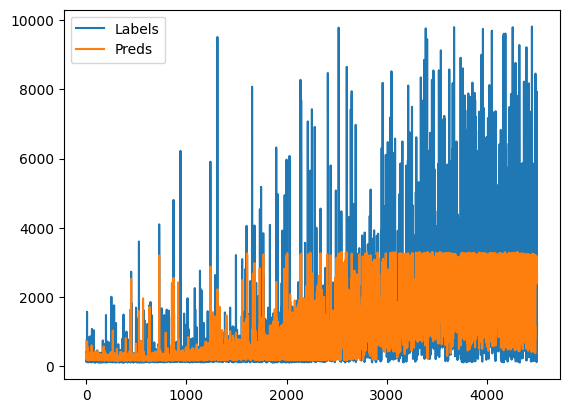

In [67]:
plt.plot(fin_labels)
plt.plot(fin_preds)
plt.legend(['Labels','Preds'])

In [77]:
sorted_indices = np.argsort(fin_labels)
si = sorted_indices.tolist()

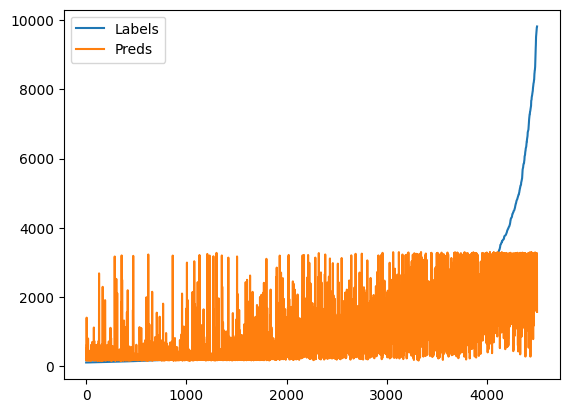

In [83]:
# Sort array1 in increasing order
sorted_fin_labels = fin_labels[si]

# Use the sorted indices to rearrange array2
sorted_fin_preds = fin_preds[si]

plt.plot(sorted_fin_labels)
plt.plot(sorted_fin_preds)
plt.legend(['Labels','Preds'])

## Miscellaneous

In [ ]:
model_2.eval()
val_loss = 0.0
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        val_loss += loss.item()

average_val_loss = val_loss / len(val_loader)
print(f"Validation Loss: {average_val_loss}")

Validation Loss: 130.65498633501005


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_features, train_classes)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
preds = model_0.predict(val_features)

In [ ]:
model_1 = torch.load('/content/drive/MyDrive/model_1.pth')
model_2 = torch.load('/content/drive/MyDrive/model_2.pth')
model_3 = torch.load('/content/drive/MyDrive/model_3.pth')

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_1.to(device)
model_2.to(device)
model_3.to(device)

model_1.eval()
model_2.eval()
model_3.eval()

class CustomRegressionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = float(self.labels[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float32)
        }

val_texts = val_content

val_dataset = CustomRegressionDataset(val_texts, val_labels, tokenizer, max_length=128)
val_loader = DataLoader(val_dataset, batch_size=1)

val_loss = 0.0

cnt = 0

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        if val_classes[cnt] == 0:
          outputs = model_1(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
          loss = outputs.loss
        if val_classes[cnt] == 1:
          outputs = model_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
          loss = outputs.loss
        if val_classes[cnt] == 2:
          outputs = model_3(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
          loss = outputs.loss

        val_loss += loss.item()
        cnt += 1
        # print(cnt)

average_val_loss = val_loss / len(val_loader)
print(f"Validation Loss: {average_val_loss}")